# Credit EDA Assignment

## Problem Statement

### Business Understanding:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

Risk-1: If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

Risk-2: If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The information about the loan application at the time of applying for the loan contains two types of scenarios:

The client with payment difficulties: He/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample.

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

### Business Objectives:

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In this case study, EDA is used to understand how consumer attributes and loan attributes influence the tendency to default.

#### Importing the libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import plotly_express as px

## Data Understanding


#### Read in the dataset

In [4]:
#Using set_option to display all the columns for better understanding of data
pd.set_option('display.max_columns', None)

#read the data set of "application_data" in app_data
app_data=pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#Checking the size of the dataframe
app_data.size

37516342

In [6]:
#Checking the size of the dataframe
app_data.shape

(307511, 122)

In [7]:
#Checking the summary of the dataframe
app_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
#Checking the summary of numerical columns in the dataframe
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
#Checking the datatypes of the columns
app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [10]:
#Checking the null values present in the columns
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

## Data Cleaning and Manipulation

#### Dealing with missing values

In [11]:
#Creating a function 'null_percent' that returns percentages of null values in all the columns
def null_percent(app_data_func):
    return app_data_func.isnull().sum()/len(app_data_func)*100

In [12]:
#Calling the function
null_percent(app_data)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [13]:
#Finding the number of columns having more than 40% null values
len(null_percent(app_data)[null_percent(app_data)>40])

49

#### Observation: There are 49 columns that need to be dropped as they have more than 40% null values

#### Dropping the columns with more than 40% missing values

In [14]:
#Creating a variable 'null_index' for dropping null columns having more than 40% null values together
null_index = null_percent(app_data)[null_percent(app_data)>40].index
null_index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [15]:
#Dropping the columns with more than 40% missing values
app_data.drop(labels = null_index, axis=1, inplace=True)

#### Observation: After removing the columns with null values greater than 40%, 71 columns are left in the dataframe

#### Checking missing values for columns having null values below 13%

In [16]:
#Identifying the columns with null values below 13%
null_percent(app_data)[(null_percent(app_data)<=13) & (null_percent(app_data)>0)]

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
NAME_TYPE_SUITE             0.420148
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

#### Observation: There are 10 columns that have less than 13% null values. As these null values are very less these can be imputed without skewing the values.

#### Suggestion: 
1. These columns 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE' are numerical columns, so median can be used to impute the null values within these columns.
2. The column 'NAME_TYPE_SUITE' is a categorial column, so mode function can be used to impute the null values within this column.

In [17]:
#Checking the missing values/irrelevant data in Target variable
app_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [18]:
#Identifying the columns that are not relevant for the analysis by correlating the Target column with other columns
#sns.heatmap(app_data[['TARGET','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','EXT_SOURCE_2','EXT_SOURCE_3']].corr(), cmap='Reds', annot=True)
#plt.show()

#### Checking missing values for columns having null values between 13% and 40%

In [19]:
#Identifying the columns with null values between 13% and 40%
null_percent(app_data)[(null_percent(app_data)>=13) & (null_percent(app_data)<=40)]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

#### Suggestion & Suggestion: As 'OCCUPATION_TYPE' is a categorial variable, a new category of 'Unknown' can be created for its null values.

In [20]:
#Making a new category of 'Unknown' for null values in 'OCCUPATION_TYPE' column
app_data.OCCUPATION_TYPE = app_data.OCCUPATION_TYPE.fillna('Unknown')

In [21]:
#Checking the 'Unknown' category
app_data.OCCUPATION_TYPE.value_counts().head()

Unknown        96391
Laborers       55186
Sales staff    32102
Core staff     27570
Managers       21371
Name: OCCUPATION_TYPE, dtype: int64

#### Suggestion: All null values in 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR' columns can be imputed with their median value as imputing with their mean values will skew the data

In [22]:
#Using describe function to find irrelevant data in numerical columns
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

#### Observation: As seen from the describe function, 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE' columns are in days and are negative values.

#### Suggestion: All the values of these columns should be converted into years and into positive values.

In [23]:
#Creating a variable 'day_columns' to store these columns and apply different operations on these columns simultaneously
day_columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

In [24]:
#Converting the negative values into positive values
app_data[day_columns] = abs(app_data[day_columns])

In [25]:
#Checking the values of these columns
app_data[day_columns].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


In [26]:
#Converting the days into years
app_data[day_columns] = (app_data[day_columns])/365

In [27]:
#Checking the values of these columns
app_data[day_columns].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,25.920548,1.745205,9.994521,5.808219,3.106849
1,45.931507,3.254795,3.249315,0.797260,2.268493
2,52.180822,0.616438,11.671233,6.934247,2.232877
3,52.068493,8.326027,26.939726,6.676712,1.690411
4,54.608219,8.323288,11.810959,9.473973,3.030137


In [28]:
#Rounding of years to 2 decimal places
app_data[day_columns] = round(app_data[day_columns],2)

In [29]:
#Checking the values of these columns
app_data[day_columns].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,25.92,1.75,9.99,5.81,3.11
1,45.93,3.25,3.25,0.80,2.27
2,52.18,0.62,11.67,6.93,2.23
3,52.07,8.33,26.94,6.68,1.69
4,54.61,8.32,11.81,9.47,3.03


In [30]:
#Renaming the columns with changed values
app_data.rename(columns = {'DAYS_BIRTH': 'AGE', 'DAYS_EMPLOYED':'YEARS_EMPLOYED', 'DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'}, inplace=True)

#### Checking the datatypes of all columns

In [31]:
#Checking the datatypes of all columns
app_data.dtypes.head(60)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
AGE                            float64
YEARS_EMPLOYED                 float64
YEARS_REGISTRATION             float64
YEARS_ID_PUBLISH               float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

#### Observation & Suggestion: All the columns with object datatypes are categorial columns, and hence these should be converted into categorial columns

In [32]:
#Creating a variable 'cat_col' to store columns with object datatype and apply convert these columns simultaneously into category datatype
cat_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

In [33]:
#Converting the columns with object datatype into category datatype
app_data[cat_col] = app_data[cat_col].astype('category')

In [34]:
#Checking the datatypes of columns
app_data.dtypes.head(60)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
AGE                             float64
YEARS_EMPLOYED                  float64
YEARS_REGISTRATION              float64
YEARS_ID_PUBLISH                float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [35]:
#Creating a variable 'vc' for adding all categorical columns using for loop
vc = [app_data[i].value_counts() for i in cat_col]

In [36]:
#Checking the number of categorical columns
len(vc)

9

In [37]:
#Checking the values of all the columns to identify any irregularities in the data
vc[0],vc[1],vc[2],vc[3],vc[4],vc[5],vc[6],vc[7],vc[8]

(Cash loans         278232
 Revolving loans     29279
 Name: NAME_CONTRACT_TYPE, dtype: int64,
 F      202448
 M      105059
 XNA         4
 Name: CODE_GENDER, dtype: int64,
 N    202924
 Y    104587
 Name: FLAG_OWN_CAR, dtype: int64,
 Y    213312
 N     94199
 Name: FLAG_OWN_REALTY, dtype: int64,
 Unaccompanied      248526
 Family              40149
 Spouse, partner     11370
 Children             3267
 Other_B              1770
 Other_A               866
 Group of people       271
 Name: NAME_TYPE_SUITE, dtype: int64,
 Working                 158774
 Commercial associate     71617
 Pensioner                55362
 State servant            21703
 Unemployed                  22
 Student                     18
 Businessman                 10
 Maternity leave              5
 Name: NAME_INCOME_TYPE, dtype: int64,
 Secondary / secondary special    218391
 Higher education                  74863
 Incomplete higher                 10277
 Lower secondary                    3816
 Academic degre

#### Observation & Suggestion: Cannot identify the 'XNA' in 'CODE_GENDER', hence these values can be dropped.

#### Checking for Outliers

In [38]:
#Check outliers for all numerical columns
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,43.936976,185.548007,13.660596,8.203299,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,2.637973,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.956135,382.039306,9.651742,4.135474,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,2.265221,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.010000,2.560000,5.510000,4.710000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [39]:
app_data.SK_ID_CURR.nunique()

307511

In [40]:
#Check outliers for 'AMT_INCOME_TOTAL' columns with describe function
app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [41]:
#Check outliers for 'AMT_INCOME_TOTAL' columns with quantile function
app_data.AMT_INCOME_TOTAL.quantile([0,0.75,0.99,1])

0.00        25650.0
0.75       202500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [42]:
app_data.AMT_INCOME_TOTAL.max()

117000000.0

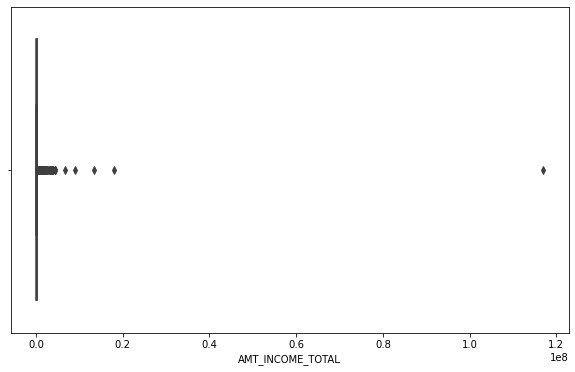

In [43]:
#Check outliers for 'AMT_INCOME_TOTAL' columns with boxplot
plt.figure(figsize=[10,6])
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()

#### Observation: We can clearly see an outlier in 'AMT_INCOME_TOTAL' column, which is very high as compared to the other values. Also, there are other multiple outliers which has smaller values.

#### Suggestion: These outliers can be capped to the 99th percentile, i.e. '472500'.

In [44]:
#Check outliers for 'AMT_CREDIT' columns with describe function
app_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [45]:
#Check outliers for 'AMT_CREDIT' columns with quantile function
app_data.AMT_CREDIT.quantile([0,0.75,0.99,1])

0.00      45000.0
0.75     808650.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

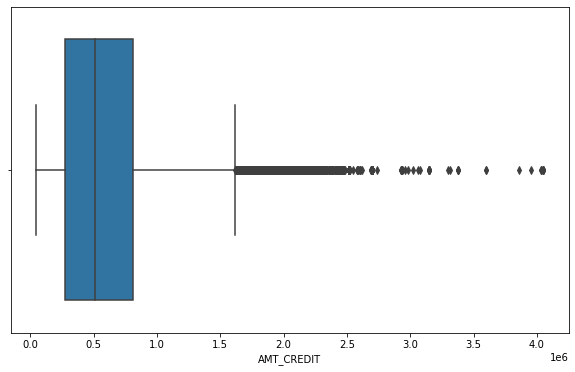

In [46]:
#Check outliers for 'AMT_CREDIT' columns with boxplot
plt.figure(figsize=[10,6])
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

#### Observation: In 'AMT_CREDIT' column, there are several continuous values as outliers, wheras on the other hand there are some discrete outliers which have very high values.

#### Suggestion: All of the outliers can be capped to the 99th percentile, i.e. '1854000'.

In [47]:
#Check outliers for 'AMT_ANNUITY' columns with quantile function
app_data.AMT_ANNUITY.quantile([0,0.75,0.99,1])

0.00      1615.5
0.75     34596.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

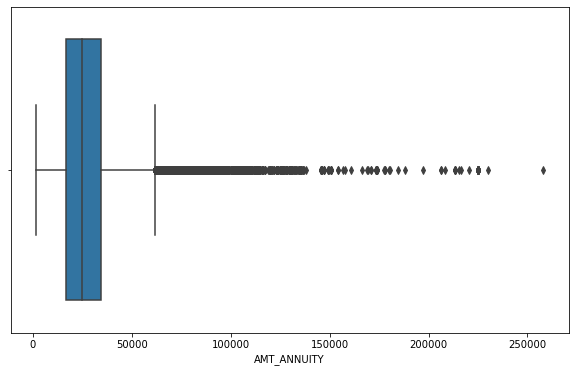

In [48]:
#Check outliers for 'AMT_ANNUITY' columns with boxplot
plt.figure(figsize=[10,6])
sns.boxplot(app_data.AMT_ANNUITY)
plt.show()

#### Observation: In 'AMT_ANNUITY' column, there are several continuous values as outliers, wheras on the other hand there are some discrete outliers which have very high values.

#### Suggestion: All of the outliers can be capped to the 99th percentile, i.e. '70006'.

In [49]:
#Check outliers for 'AMT_GOODS_PRICE' columns with quantile function
app_data.AMT_GOODS_PRICE.quantile([0,0.75,0.99,1])

0.00      40500.0
0.75     679500.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

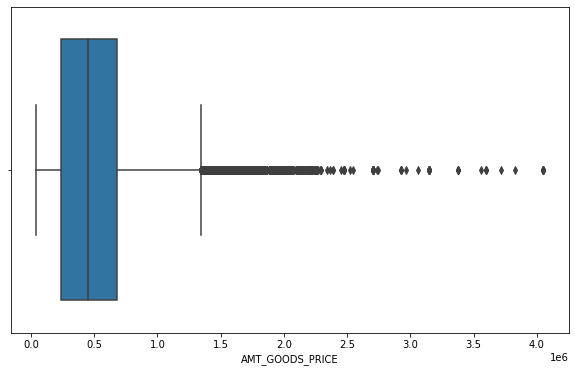

In [50]:
#Check outliers for 'AMT_GOODS_PRICE' columns with boxplot
plt.figure(figsize=[10,6])
sns.boxplot(app_data.AMT_GOODS_PRICE)
plt.show()

#### Observation: In 'AMT_GOODS_PRICE' column, there are several continuous values as outliers, wheras on the other hand there are some discrete outliers which have very high values.

#### Suggestion: All of the outliers can be capped to the 99th percentile, i.e. '1800000'.

In [51]:
#Check outliers for 'CNT_CHILDREN' columns with quantile function
app_data.CNT_CHILDREN.quantile([0,0.75,0.99,1])

0.00     0.0
0.75     1.0
0.99     3.0
1.00    19.0
Name: CNT_CHILDREN, dtype: float64

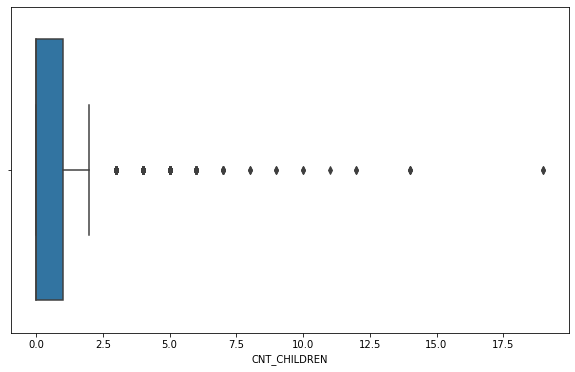

In [52]:
#Check outliers for 'CNT_CHILDREN' columns with boxplot
plt.figure(figsize=[10,6])
sns.boxplot(app_data.CNT_CHILDREN)
plt.show()

#### Observation: In 'CNT_CHILDREN' column, there are several discrete outliers which have very high values.

#### Suggestion: All of the outliers can be capped to the 99th percentile, i.e. '3'.

### Binning

Creating numerical columns into categorical columns

In [53]:
#Creating bins for 'AMT_INCOME_TOTAL' column
app_data_temp = app_data.AMT_INCOME_TOTAL/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
buckets = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L+']

#Creating a new column for storing bins
app_data['AMT_INCOME_BUCKETS']=pd.cut(app_data_temp,bins,labels=buckets)

#Rounding off the values to 2 decimal places
round((app_data['AMT_INCOME_BUCKETS'].value_counts(normalize = True)*100),2)

1L-2L     50.73
2L-3L     21.21
0-1L      20.73
3L-4L      4.78
4L-5L      1.74
5L-6L      0.36
6L-7L      0.28
8L-9L      0.10
7L-8L      0.05
9L-10L     0.01
10L+       0.01
Name: AMT_INCOME_BUCKETS, dtype: float64

In [54]:
#Creating bins for 'AMT_CREDIT' column
app_data_temp = app_data.AMT_CREDIT/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
buckets = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L+']

#Creating a new column for storing bins
app_data['AMT_CREDIT_BUCKETS']=pd.cut(app_data_temp,bins,labels=buckets)

#Rounding off the values to 2 decimal places
round((app_data['AMT_CREDIT_BUCKETS'].value_counts(normalize = True)*100),2)

2L-3L     20.23
5L-6L     12.63
4L-5L     11.82
1L-2L     11.12
3L-4L      9.72
6L-7L      8.88
8L-9L      8.04
7L-8L      7.08
10L+       4.95
9L-10L     3.29
0-1L       2.22
Name: AMT_CREDIT_BUCKETS, dtype: float64

In [55]:
#Creating bins for 'AMT_GOODS_PRICE' column
app_data_temp = app_data.AMT_GOODS_PRICE/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
buckets = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L+']

#Creating a new column for storing bins
app_data['AMT_GOODS_PRICE_BUCKETS']=pd.cut(app_data_temp,bins,labels=buckets)

#Rounding off the values to 2 decimal places
round((app_data['AMT_GOODS_PRICE_BUCKETS'].value_counts(normalize = True)*100),2)

2L-3L     22.69
4L-5L     20.60
6L-7L     14.47
1L-2L     11.91
8L-9L      7.77
3L-4L      7.67
5L-6L      4.74
0-1L       3.15
7L-8L      2.93
9L-10L     2.81
10L+       1.27
Name: AMT_GOODS_PRICE_BUCKETS, dtype: float64

In [56]:
app_data['AMT_GOODS_PRICE_BUCKETS']

0         3L-4L
1           NaN
2         1L-2L
3         2L-3L
4         5L-6L
          ...  
307506    2L-3L
307507    2L-3L
307508    5L-6L
307509    3L-4L
307510    6L-7L
Name: AMT_GOODS_PRICE_BUCKETS, Length: 307511, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L+']

In [57]:
#Checking the newly made binned columns
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AMT_GOODS_PRICE_BUCKETS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.92,1.75,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.18,0.62,11.67,6.93,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,1L-2L,1L-2L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.07,8.33,26.94,6.68,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,1.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1L-2L,3L-4L,2L-3L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.61,8.32,11.81,9.47,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L


## Data Analysis

#### Dividing the dataframe into two subset dataframes - 'defaulter' and 'repayer'

In [58]:
#Creating a new datafreme 'defaulter' to store all the defaulter data in this dataframe
defaulter = app_data[app_data.TARGET == 1]
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AMT_GOODS_PRICE_BUCKETS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.92,1.75,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51.30,7.20,18.01,5.01,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0.44,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,1L-2L,9L-10L,7L-8L
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47.90,3.46,3.24,2.82,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,2.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,2L-3L,NaN,8L-9L
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36.67,9.85,0.12,12.08,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,4.05,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1L-2L,2L-3L,2L-3L
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67.93,1000.67,14.77,11.50,1,0,0,1,0,0,Unknown,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,2L-3L,2L-3L


In [59]:
defaulter.TARGET.value_counts()

1    24825
Name: TARGET, dtype: int64

In [60]:
#Creating a new datafreme 'repayer' to store all the repayer data in this dataframe
repayer = app_data[app_data.TARGET == 0]
repayer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AMT_GOODS_PRICE_BUCKETS
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.18,0.62,11.67,6.93,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,1L-2L,1L-2L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.07,8.33,26.94,6.68,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,1.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1L-2L,3L-4L,2L-3L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.61,8.32,11.81,9.47,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.41,4.35,13.62,1.31,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,6.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0-1L,4L-5L,4L-5L


In [61]:
repayer.TARGET.value_counts()

0    282686
Name: TARGET, dtype: int64

#### Checking the Imbalance percentage

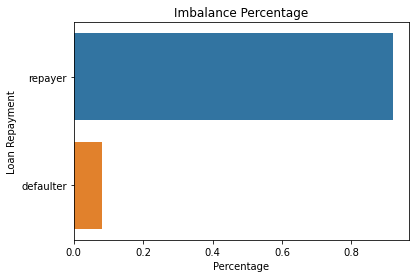

In [62]:
#Checking the imbalance percentage between males and females
sns.barplot(x=app_data['TARGET'].value_counts(normalize=True),y=['repayer','defaulter'])
plt.title('Imbalance Percentage')
plt.xlabel('Percentage')
plt.ylabel('Loan Repayment')
plt.show()

In [63]:
#Calculating the imbalance percentages
percent_repayer = len(repayer.TARGET)/len(app_data.TARGET)
percent_defaulter = len(defaulter.TARGET)/len(app_data.TARGET)

round((percent_repayer*100),2), round((percent_defaulter*100),2)

(91.93, 8.07)

#### Observation: The repayer percentage is 91.93% and the defaulter percentage is 8.07%.

### Univariate Analysis

#### Categorical unordered univariate analysis

In [64]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AMT_GOODS_PRICE_BUCKETS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.92,1.75,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.18,0.62,11.67,6.93,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,1L-2L,1L-2L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.07,8.33,26.94,6.68,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,1.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1L-2L,3L-4L,2L-3L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.61,8.32,11.81,9.47,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L


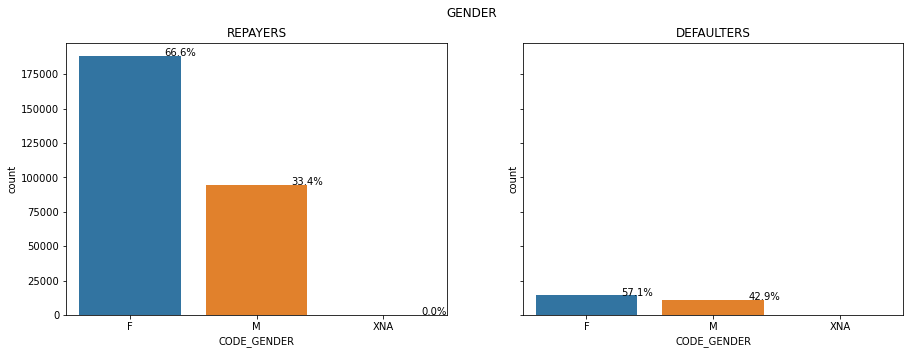

In [65]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('GENDER')
totalr = len(repayer.CODE_GENDER)
totald = len(defaulter.CODE_GENDER)

rep = sns.countplot(ax=axes[0], x='CODE_GENDER', data=repayer)
axes[0].set_title('REPAYERS')

dflt = sns.countplot(ax=axes[1], x='CODE_GENDER', data=defaulter)
axes[1].set_title('DEFAULTERS')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation: 
1. Female defaulters are more than the male defaulters, this can be due to the greater number of female clients as compared to male clients.
2. Female clients have higher percentage (57.1%) of not repaying their loans, whereas male defaulters are 42.9%.

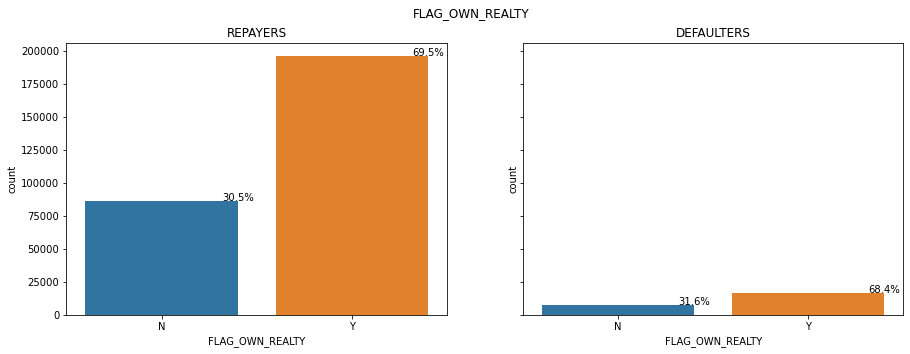

In [66]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('FLAG_OWN_REALTY')
totalr = len(repayer.FLAG_OWN_REALTY)
totald = len(defaulter.FLAG_OWN_REALTY)

rep = sns.countplot(ax=axes[0], x='FLAG_OWN_REALTY', data=repayer)
axes[0].set_title('REPAYERS')

dflt = sns.countplot(ax=axes[1], x='FLAG_OWN_REALTY', data=defaulter)
axes[1].set_title('DEFAULTERS')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation:
1. In both the cases, clients who own the real estate are almost double than the clients who don't own a real estate. 
2. In case of defaulters, the clients who own real estate (68.4%) are more likely to not pay their loans as compared to the clients who doesn't own a real estate (31.6%).

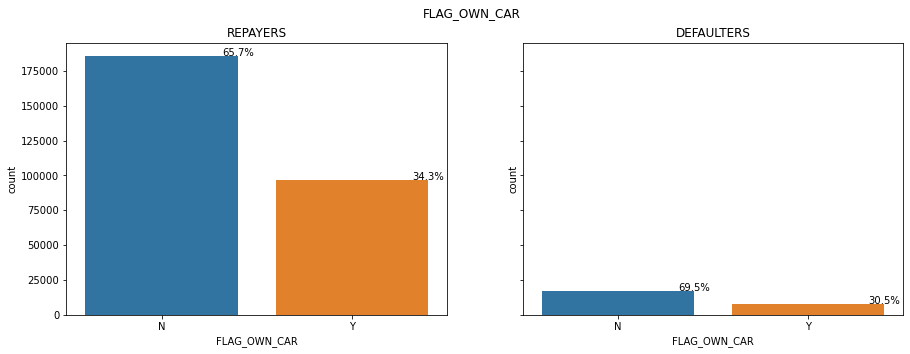

In [67]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('FLAG_OWN_CAR')
totalr = len(repayer.FLAG_OWN_CAR)
totald = len(defaulter.FLAG_OWN_CAR)

rep = sns.countplot(ax=axes[0], x='FLAG_OWN_CAR', data=repayer)
axes[0].set_title('REPAYERS')

dflt = sns.countplot(ax=axes[1], x='FLAG_OWN_CAR', data=defaulter)
axes[1].set_title('DEFAULTERS')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation:
1. In both the cases, clients who own a car are almost half than the clients who don't own a car. 
2. In case of defaulters, the clients who don't own a car (69.5%) are more likely to not pay their loans as compared to the clients who own a car (30.5%).

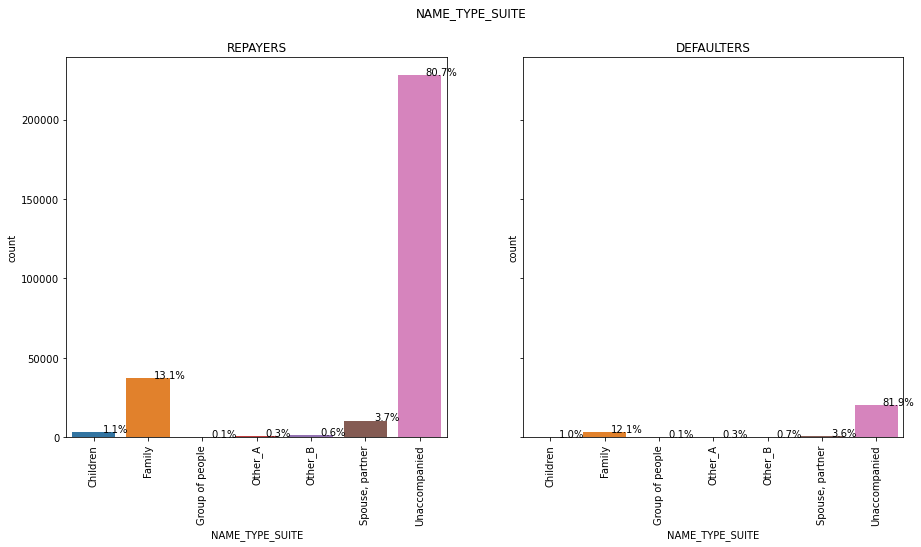

In [68]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
fig.suptitle('NAME_TYPE_SUITE')
totalr = len(repayer.NAME_TYPE_SUITE)
totald = len(defaulter.NAME_TYPE_SUITE)

rep = sns.countplot(ax=axes[0], x='NAME_TYPE_SUITE', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='NAME_TYPE_SUITE', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation:
1. According to the charts, among the repayers the highest percentage is of unaccompanied clients (80.7%) and among the defaulters, also the highest percentage is of unaccompanied clients (81.9%).
2. After the accompanied clients, the second highest percentages is of family among the repayers (13.1%) and defaulters (12.1%).

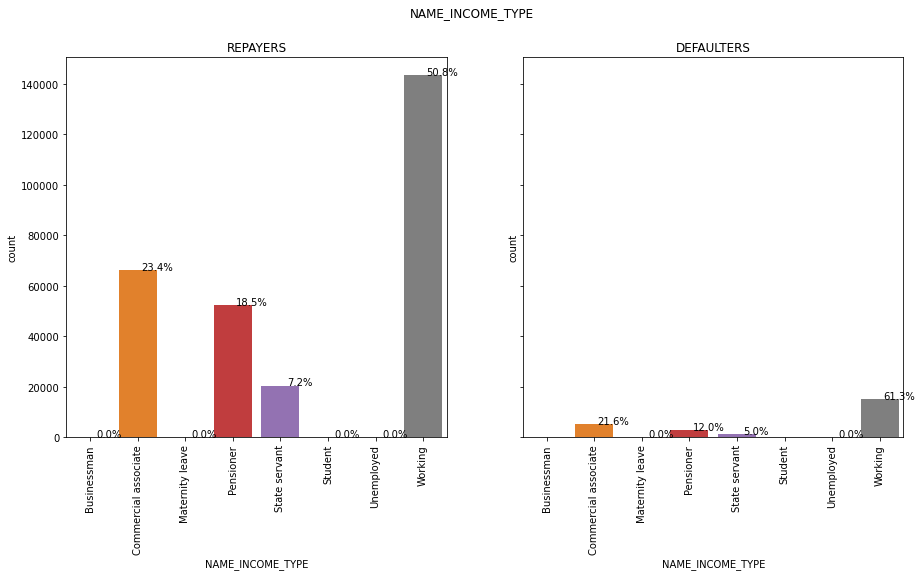

In [69]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
fig.suptitle('NAME_INCOME_TYPE')
totalr = len(repayer.NAME_INCOME_TYPE)
totald = len(defaulter.NAME_INCOME_TYPE)

rep = sns.countplot(ax=axes[0], x='NAME_INCOME_TYPE', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='NAME_INCOME_TYPE', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation:
1. Major clients taking loans are working professionals, and the are most likely to be defaulters (61.3%).
2. After the working professionals, commercial associates (21.6%) and pensioners (12%) are most likely to be defaulters.

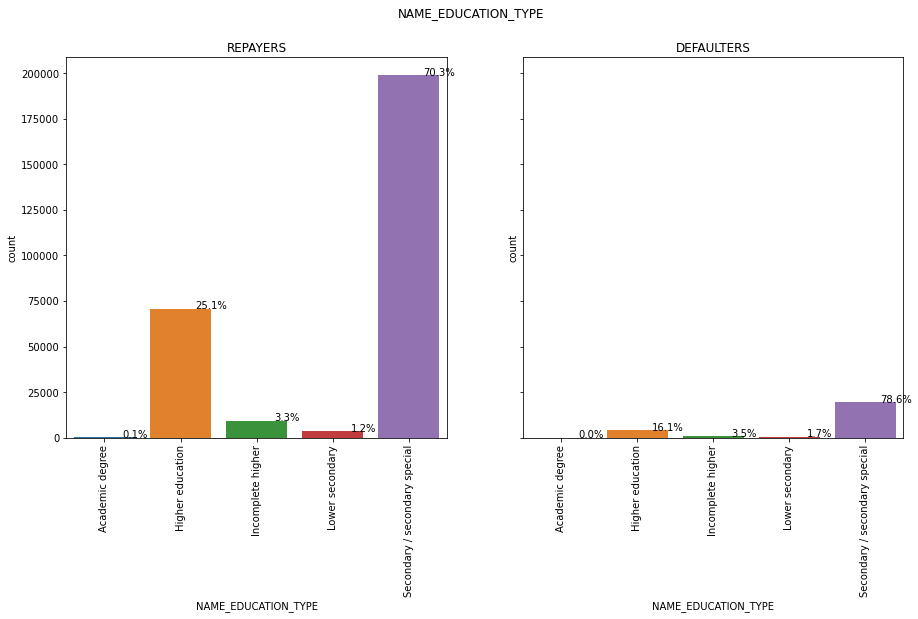

In [70]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
fig.suptitle('NAME_EDUCATION_TYPE')
totalr = len(repayer.NAME_EDUCATION_TYPE)
totald = len(defaulter.NAME_EDUCATION_TYPE)

rep = sns.countplot(ax=axes[0], x='NAME_EDUCATION_TYPE', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='NAME_EDUCATION_TYPE', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation: Clients having secondary education (78.6%), and higher education (16.1%) are most likely to be defaulters.

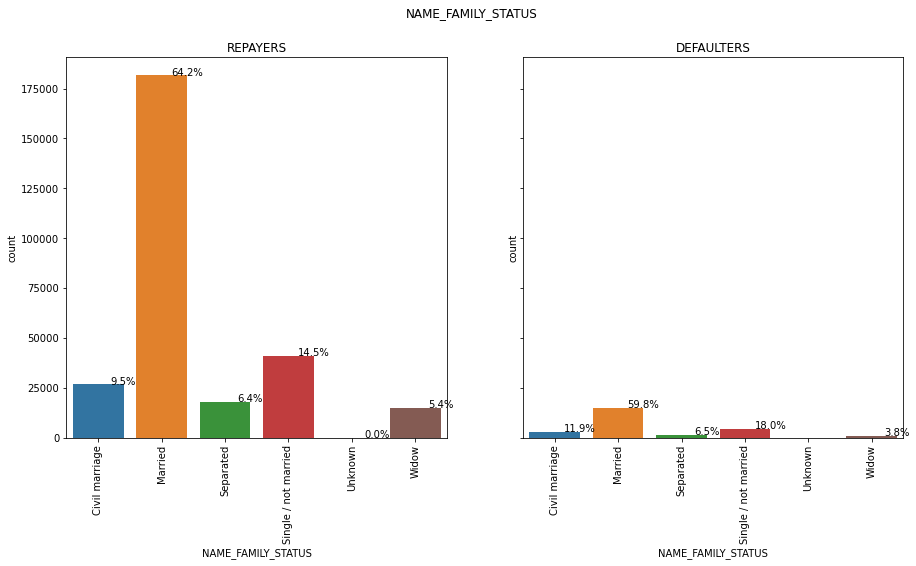

In [71]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
fig.suptitle('NAME_FAMILY_STATUS')
totalr = len(repayer.NAME_FAMILY_STATUS)
totald = len(defaulter.NAME_FAMILY_STATUS)

rep = sns.countplot(ax=axes[0], x='NAME_FAMILY_STATUS', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='NAME_FAMILY_STATUS', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation: Married clients (59.8%) and single clients (18%) are most likely to be defaulters.

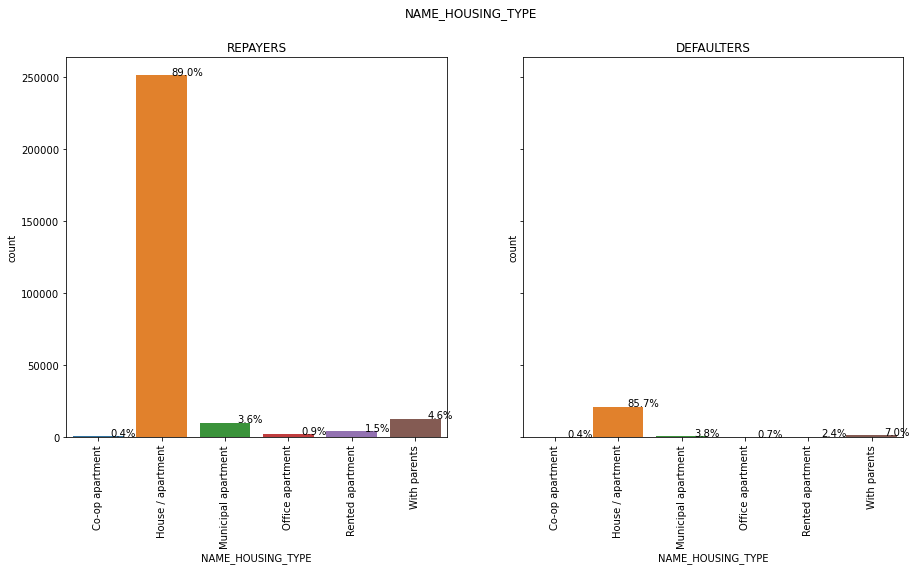

In [72]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
fig.suptitle('NAME_HOUSING_TYPE')
totalr = len(repayer.NAME_HOUSING_TYPE)
totald = len(defaulter.NAME_HOUSING_TYPE)

rep = sns.countplot(ax=axes[0], x='NAME_HOUSING_TYPE', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='NAME_HOUSING_TYPE', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation: Clients living in house or apartments are most likely to be defaulters (85.7%)

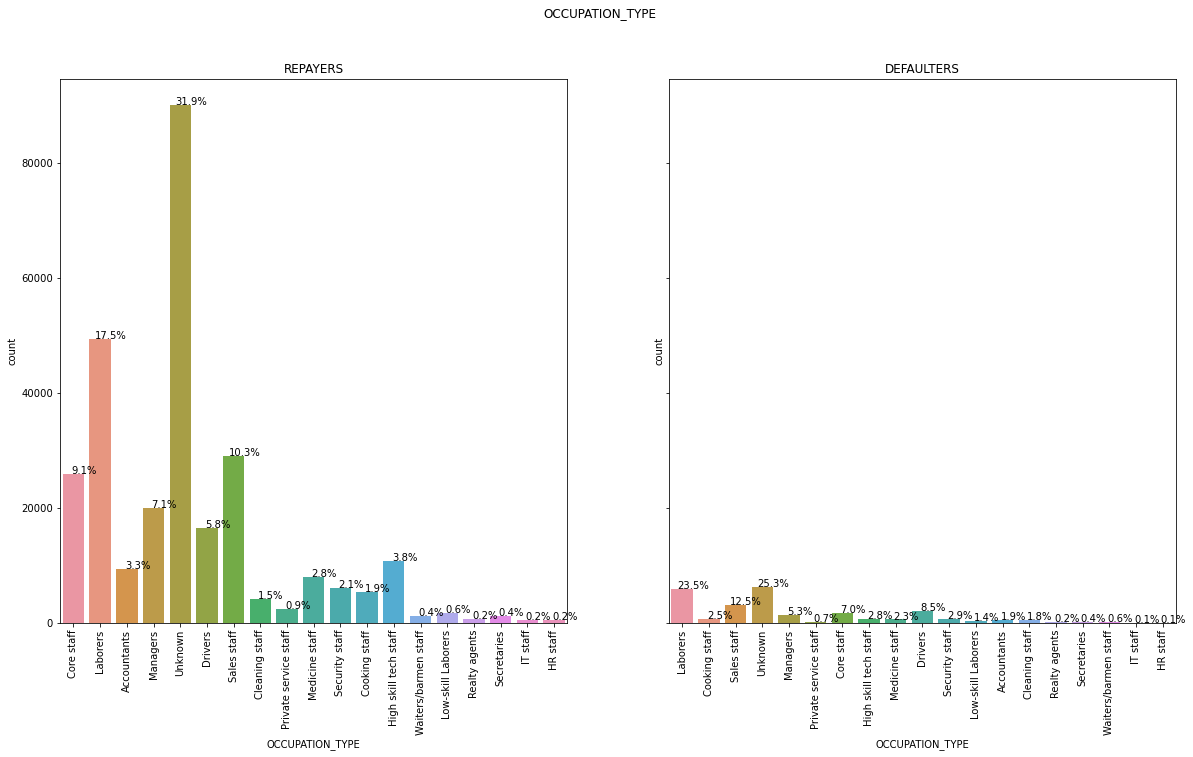

In [73]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('OCCUPATION_TYPE')
totalr = len(repayer.OCCUPATION_TYPE)
totald = len(defaulter.OCCUPATION_TYPE)

rep = sns.countplot(ax=axes[0], x='OCCUPATION_TYPE', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='OCCUPATION_TYPE', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation: Unknown category is most lkely to be defaulter (25.3%). Next, labour clients are 23.3% defaulters, sales staff are 12.5% defaulters, and drivers are 8.5% defaulters.

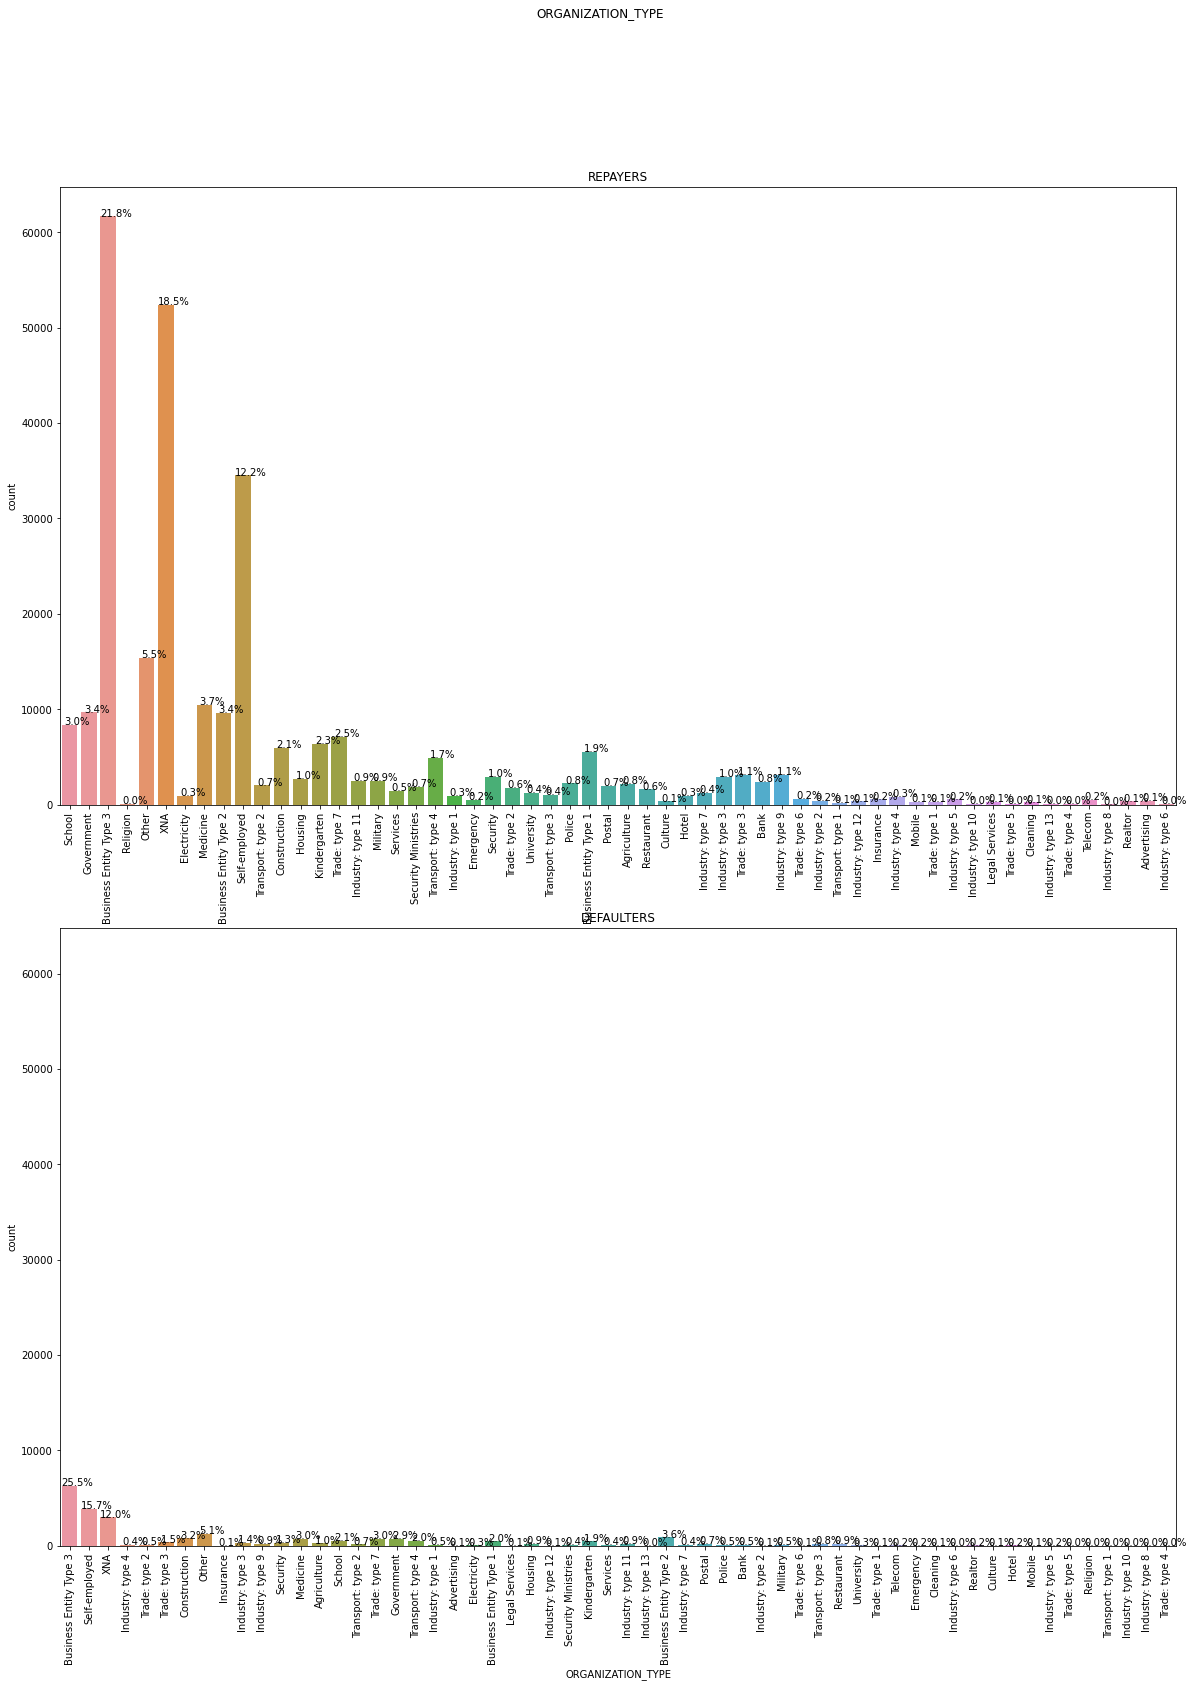

In [74]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(2, 1, figsize=(20, 25), sharey=True)
fig.suptitle('ORGANIZATION_TYPE')
totalr = len(repayer.ORGANIZATION_TYPE)
totald = len(defaulter.ORGANIZATION_TYPE)

rep = sns.countplot(ax=axes[0], x='ORGANIZATION_TYPE', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='ORGANIZATION_TYPE', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation: Clients working in Business type 3 (25.5%), self-employed (15.7%), XNA (12%) are defaulters.

#### Categorical ordered univariate analysis

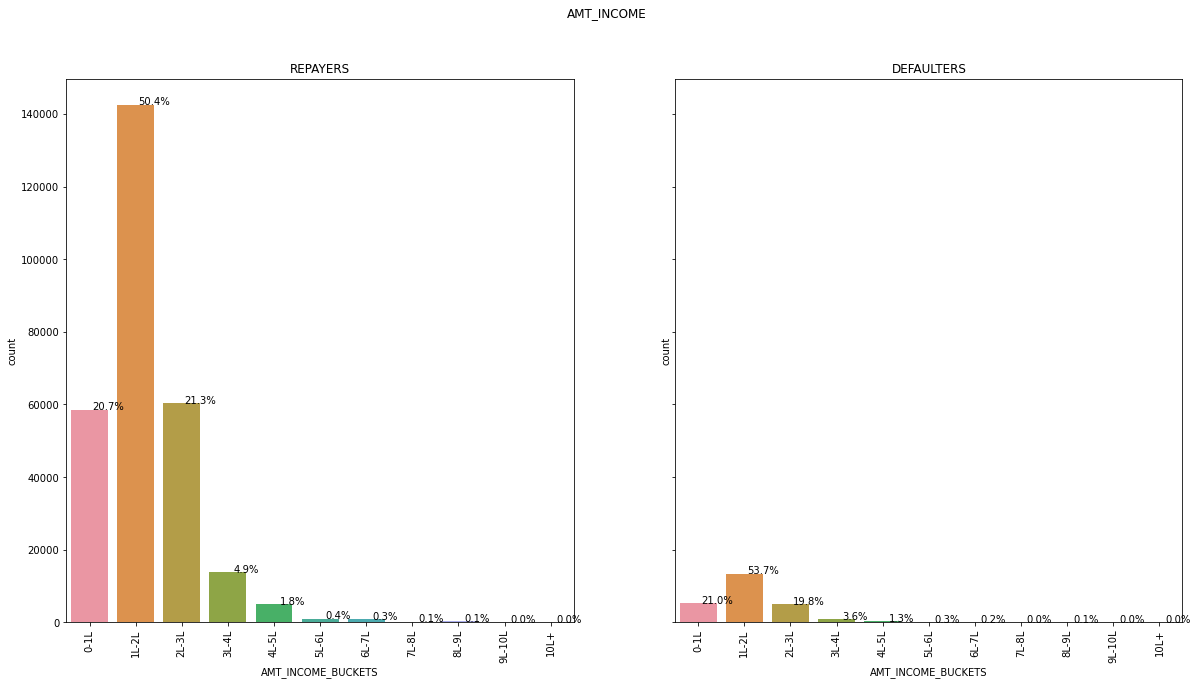

In [75]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('AMT_INCOME')
totalr = len(repayer.AMT_INCOME_BUCKETS)
totald = len(defaulter.AMT_INCOME_BUCKETS)

rep = sns.countplot(ax=axes[0], x='AMT_INCOME_BUCKETS', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='AMT_INCOME_BUCKETS', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation: Clients with income in range 1-2L (53.7%), 0-1L (21%), and 2-3L (19.8%) are defaulters.

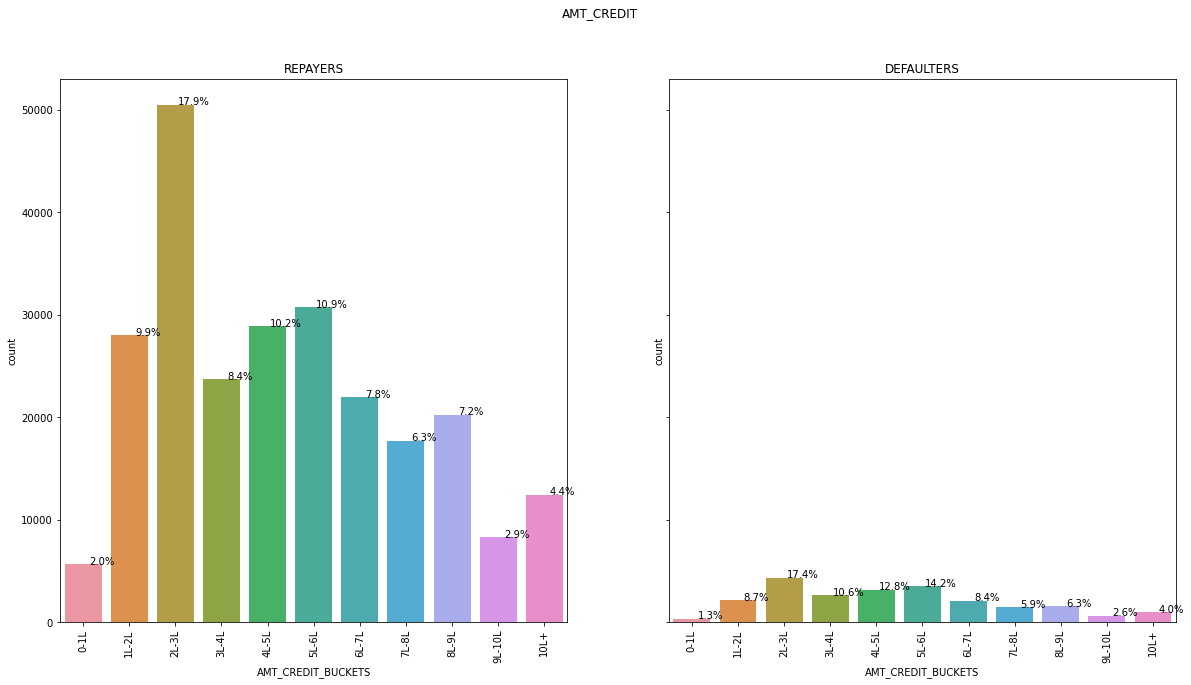

In [76]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('AMT_CREDIT')
totalr = len(repayer.AMT_CREDIT_BUCKETS)
totald = len(defaulter.AMT_CREDIT_BUCKETS)

rep = sns.countplot(ax=axes[0], x='AMT_CREDIT_BUCKETS', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='AMT_CREDIT_BUCKETS', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation: Clients with credit amount in range 2-3L (17.4%) and 5-6L (14.2%) are defaulters.

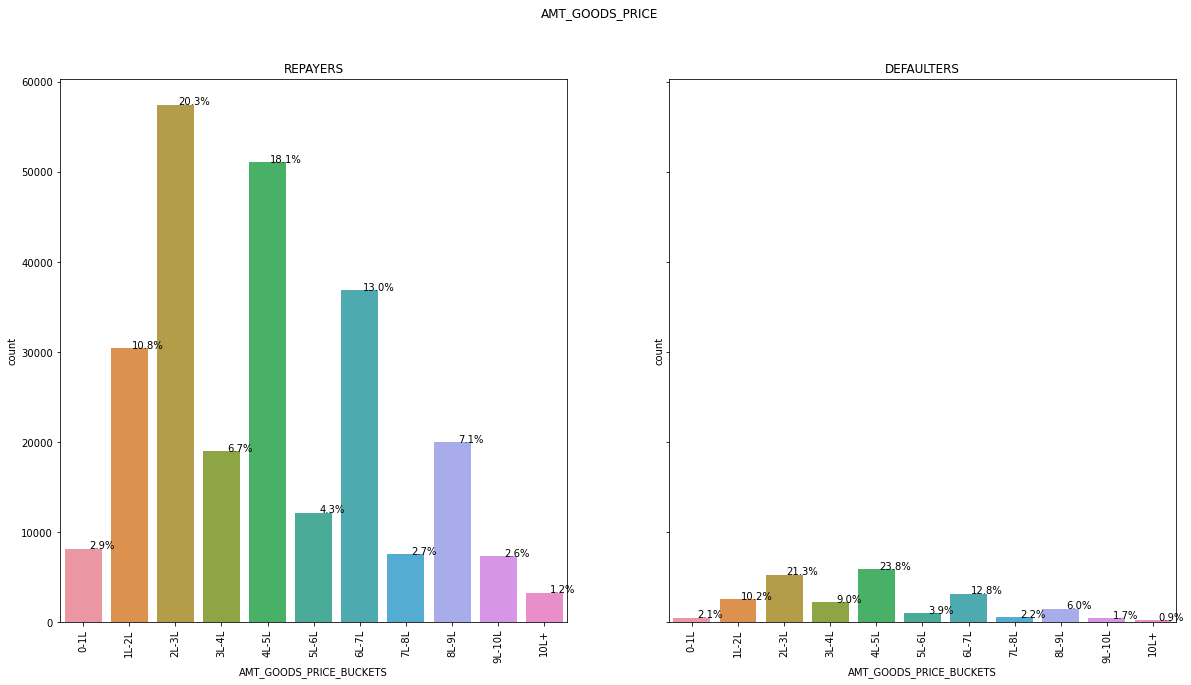

In [77]:
#Creating charts to compare 'repayers' vs 'defaulters'
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('AMT_GOODS_PRICE')
totalr = len(repayer.AMT_GOODS_PRICE_BUCKETS)
totald = len(defaulter.AMT_GOODS_PRICE_BUCKETS)

rep = sns.countplot(ax=axes[0], x='AMT_GOODS_PRICE_BUCKETS', data=repayer)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='AMT_GOODS_PRICE_BUCKETS', data=defaulter)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation: Clients taking loan against goods price 4-5L (23.8%) and 2-3L (21.3%) are defaulters.

### Bivariate Analysis
#### Numeric-Numeric Analysis

In [78]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AMT_GOODS_PRICE_BUCKETS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.92,1.75,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.18,0.62,11.67,6.93,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-1L,1L-2L,1L-2L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.07,8.33,26.94,6.68,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,1.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1L-2L,3L-4L,2L-3L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.61,8.32,11.81,9.47,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L


In [79]:
#Making correlation with all columns
app_data_corr=app_data.corr()

In [80]:
#Making correlation of all columns with 'TARGET' column
app_data_corr=app_data_corr['TARGET']

In [81]:
#Sorting the top 10 correlations with 'TARGET' column
app_data_top10=app_data_corr.abs().sort_values(ascending=False)[:11,]

In [82]:
#Printing the top 10 correlations with 'TARGET' column
app_data_top10

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
AGE                            0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
YEARS_LAST_PHONE_CHANGE        0.055219
YEARS_ID_PUBLISH               0.051457
REG_CITY_NOT_WORK_CITY         0.050994
YEARS_EMPLOYED                 0.047046
FLAG_EMP_PHONE                 0.045982
Name: TARGET, dtype: float64

In [83]:
#Finding correlation of repayers with each other
repayer_corr=repayer.corr()
repayer_corr=repayer_corr[repayer_corr!=1.0]

In [84]:
repayer_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001345,0.001744,0.001475,0.000078,0.002925,-0.001717,-0.000854,0.003319,0.001408,0.000229,-0.002790,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001589,0.000309,-0.000695,0.000556,-0.000741,0.002382,0.000995,0.001342,-0.003217,-0.004321,-0.001426,0.001972,-0.003047,0.001618,0.002007,-0.000852,-0.001900,-0.001092,0.001006,-0.001236,0.002330,-0.000753,0.001776,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336967,-0.245174,-0.185790,0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,-0.041729,0.014471,-0.002246,0.014137,-0.002172,0.008501,0.003736,0.055718,-0.003833,-0.016239,-0.158963,-0.001442,0.053919,-0.002358,-0.002859,-0.005059,0.000322,0.004340,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,NaN,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022897,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.072401,-0.027828,-0.027621,-0.027690,-0.027593,0.041339,-0.002857,-0.039251,0.001160,0.004161,-0.100271,0.009035,0.159350,0.040088,0.000637,0.005402,0.005680,0.049421,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,NaN,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001465,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,0.036085,-0.000914,-0.019851,-0.000892,-0.022225,0.069541,0.005490,0.100334,0.000567,-0.011750,-0.050260,-0.003613,0.084524,0.022297,-0.003243,0.028341,0.003956,0.053726,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.001725,NaN,0.000648,0.007862,0.004409,0.0

In [85]:
#Converting columns into rows
repayer_corr=repayer_corr.unstack()

In [86]:
#Sorting the correlation values
repayer_top10=repayer_corr.abs().sort_values(ascending=False).head(10)

repayer_top10

YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999756
FLAG_EMP_PHONE               YEARS_EMPLOYED                 0.999756
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998508
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998508
AMT_GOODS_PRICE              AMT_CREDIT                     0.987250
AMT_CREDIT                   AMT_GOODS_PRICE                0.987250
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
dtype: float64

In [87]:
#Finding correlation of defaulter with each other
defaulter_corr=defaulter.corr()
defaulter_corr=defaulter_corr[defaulter_corr!=1.0]

#Converting columns into rows
defaulter_corr=defaulter_corr.unstack()

#Sorting the correlation values
defaulter_top10=defaulter_corr.abs().sort_values(ascending=False).head(10)

defaulter_top10

FLAG_EMP_PHONE               YEARS_EMPLOYED                 0.999705
YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999705
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
AMT_CREDIT                   AMT_GOODS_PRICE                0.983103
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
dtype: float64

In [88]:
#Making a variable to store colum variables for correlations
corr_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

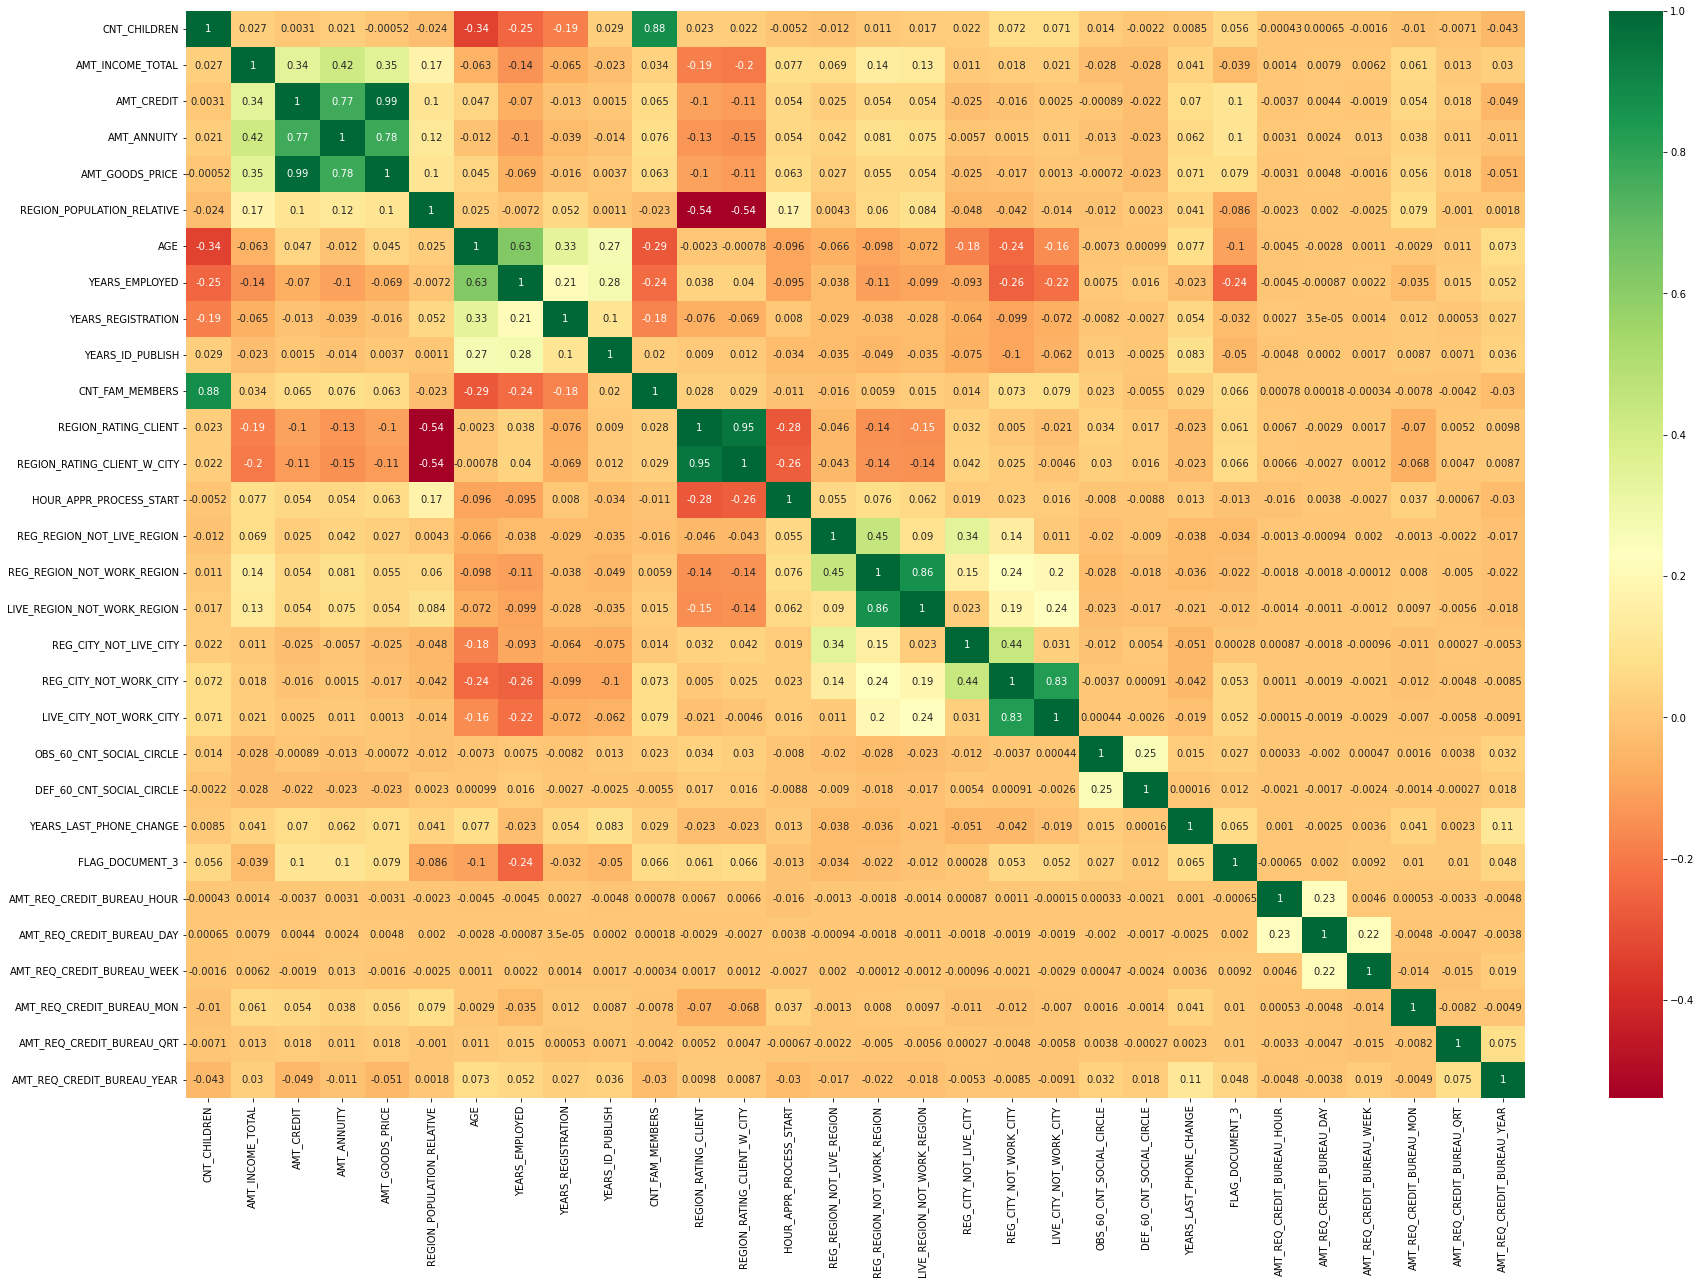

In [89]:
#Making correlation heatmap
plt.figure(figsize=[30,20])
sns.heatmap(repayer[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr(), cmap='RdYlGn', annot=True)
plt.show()

#### Observation: High correlations among repayers:
1. Goods price with credit amount
2. Loan annuity with credit amount
3. Loan annuity with goods price

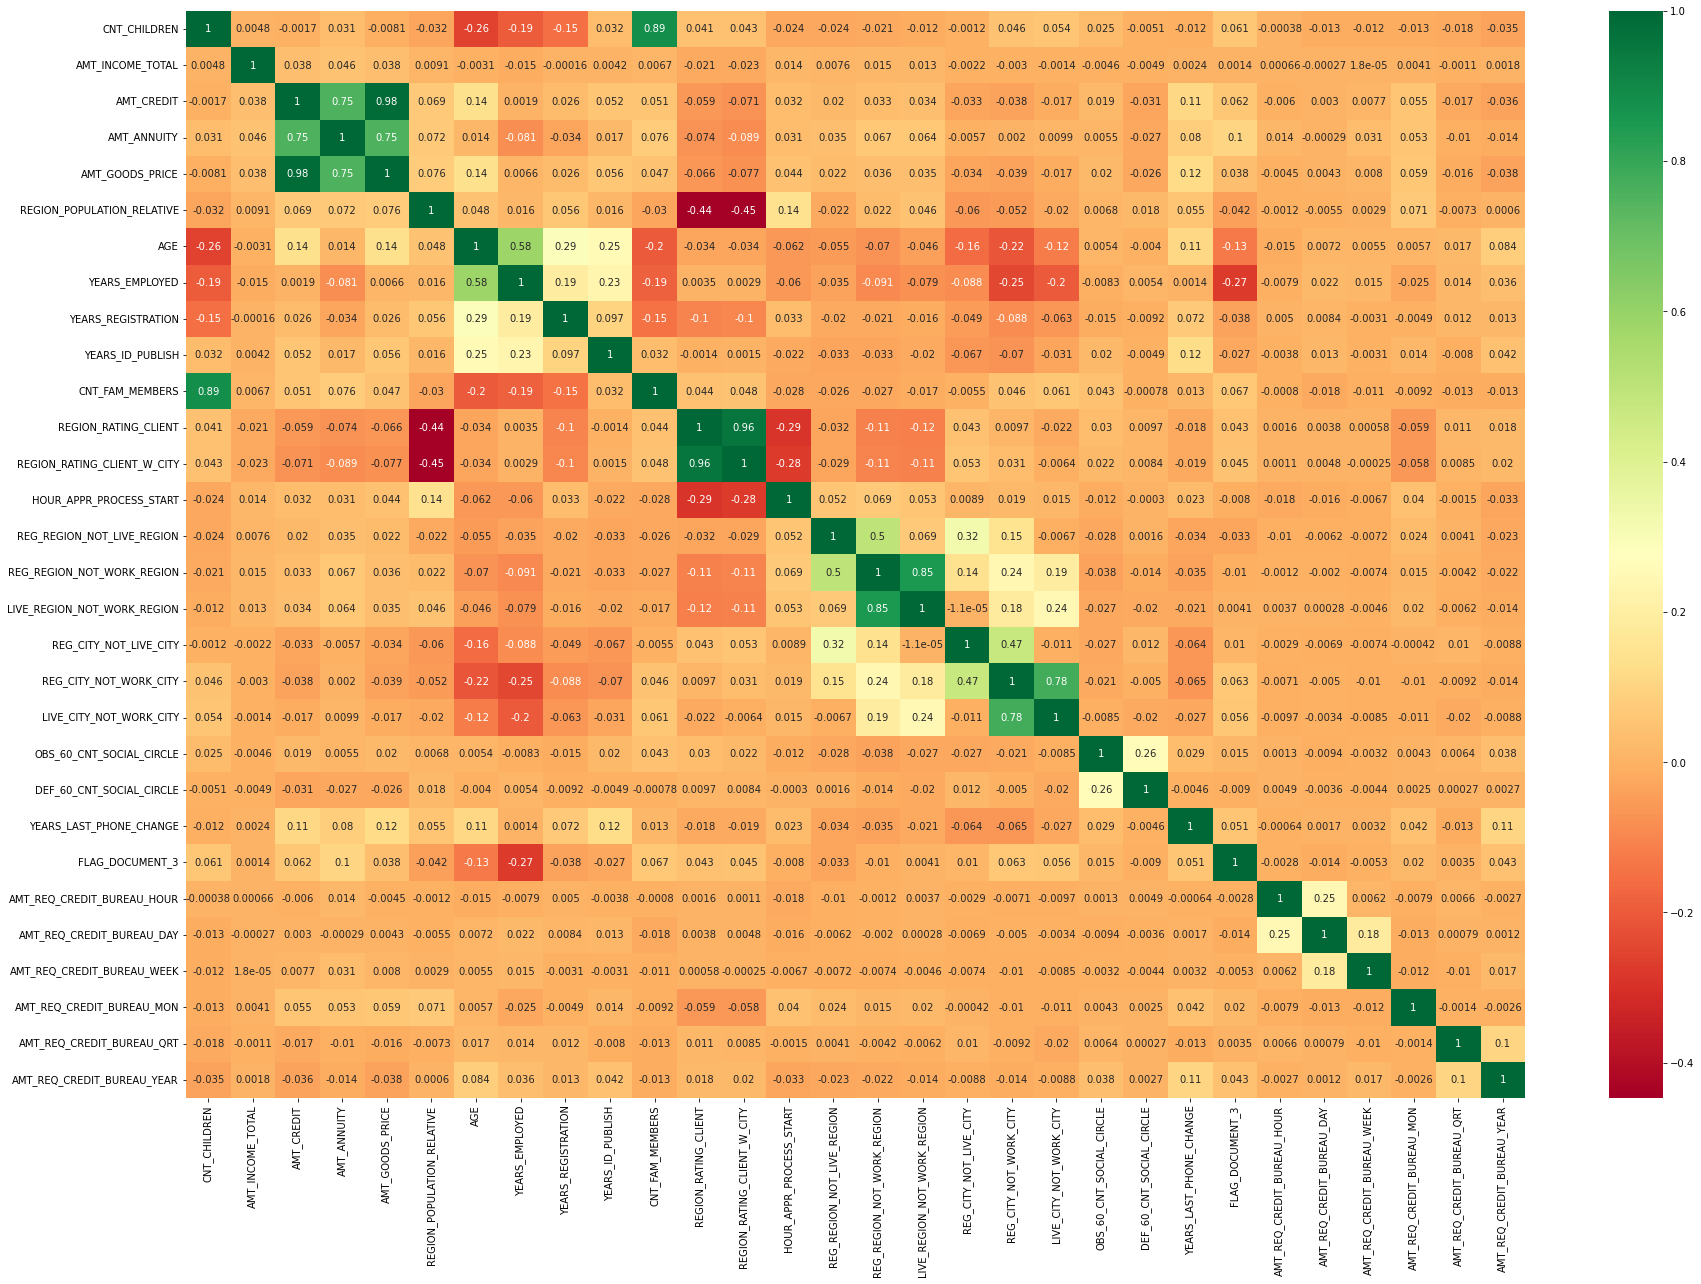

In [90]:
#Making correlation heatmap
plt.figure(figsize=[30,20])
sns.heatmap(defaulter[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr(), cmap='RdYlGn', annot=True)
plt.show()

#### Observation: High correlations among defaulters (slightly changed from repayers):
1. Goods price with credit amount
2. Loan annuity with credit amount
3. Loan annuity with goods price

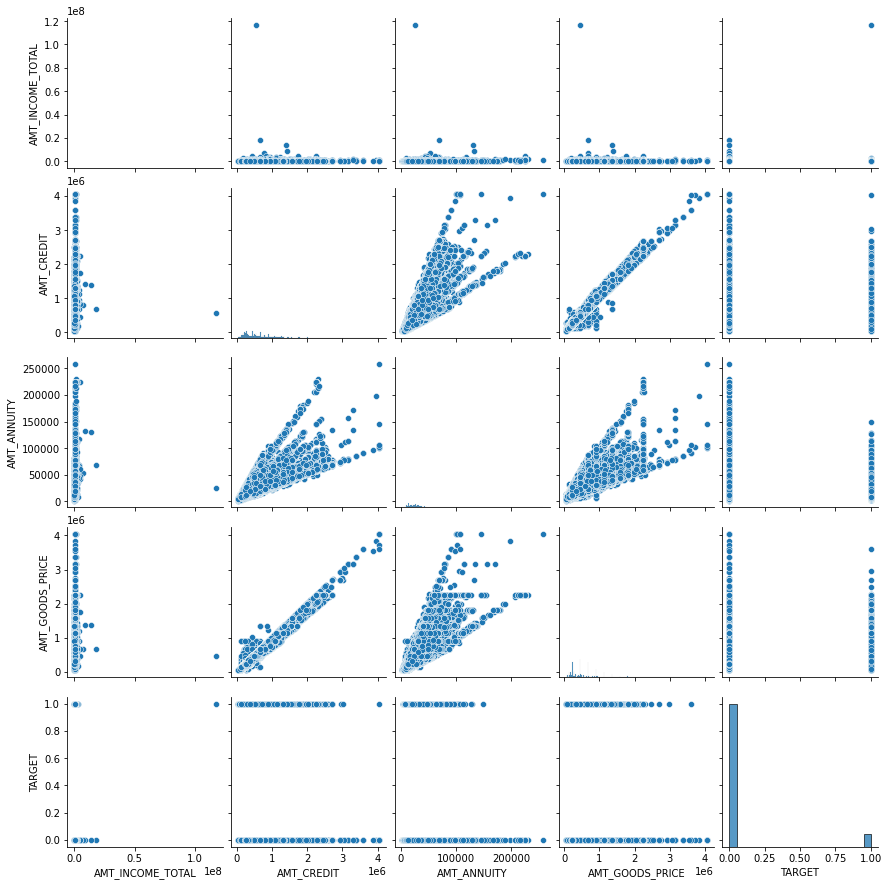

In [91]:
#Creating pairplot for numeric-numeric analysis of repayers
sns.pairplot(app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']])
plt.show()

#### Observation: High linearity between credit amount and goods price.

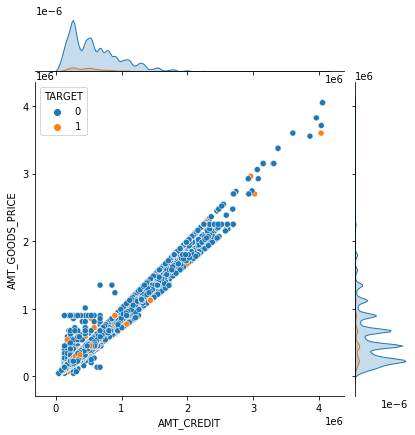

In [92]:
#Creating jointplot for 'AMT_CREDIT' and 'AMT_GOODS_PRICE'
sns.jointplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=app_data,hue='TARGET')
plt.show()

#### Observation: Most of the defaulters are with lower credit amount and lower goods price.

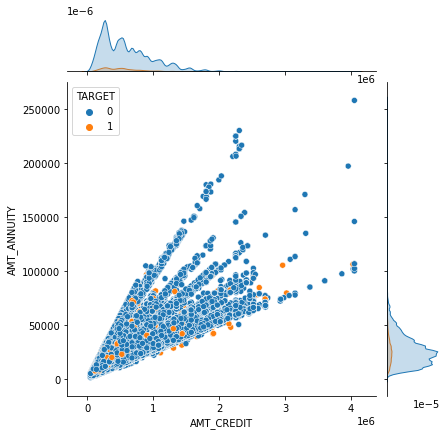

In [93]:
#Creating jointplot for 'AMT_CREDIT' and 'AMT_ANUUITY'
sns.jointplot(x='AMT_CREDIT',y='AMT_ANNUITY',data=app_data,hue='TARGET')
plt.show()

#### Observation: Most of the defaulters are with lower to medium credit amount and lower to medium loan annuity.

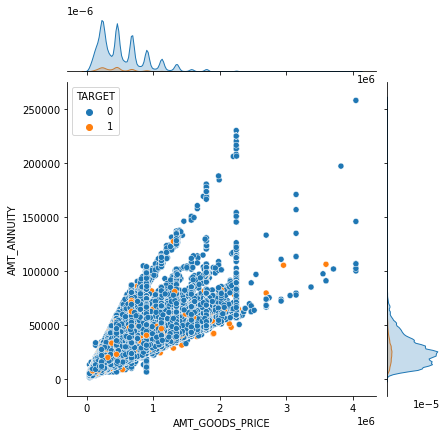

In [94]:
#Creating jointplot for 'AMT_GOODS_PRICE' and 'AMT_ANUUITY'
sns.jointplot(x='AMT_GOODS_PRICE',y='AMT_ANNUITY',data=app_data,hue='TARGET')
plt.show()

#### Observation: Most of the defaulters are with lower to medium goods price and lower to medium loan annuity.

#### Categorial - Categorical Analysis

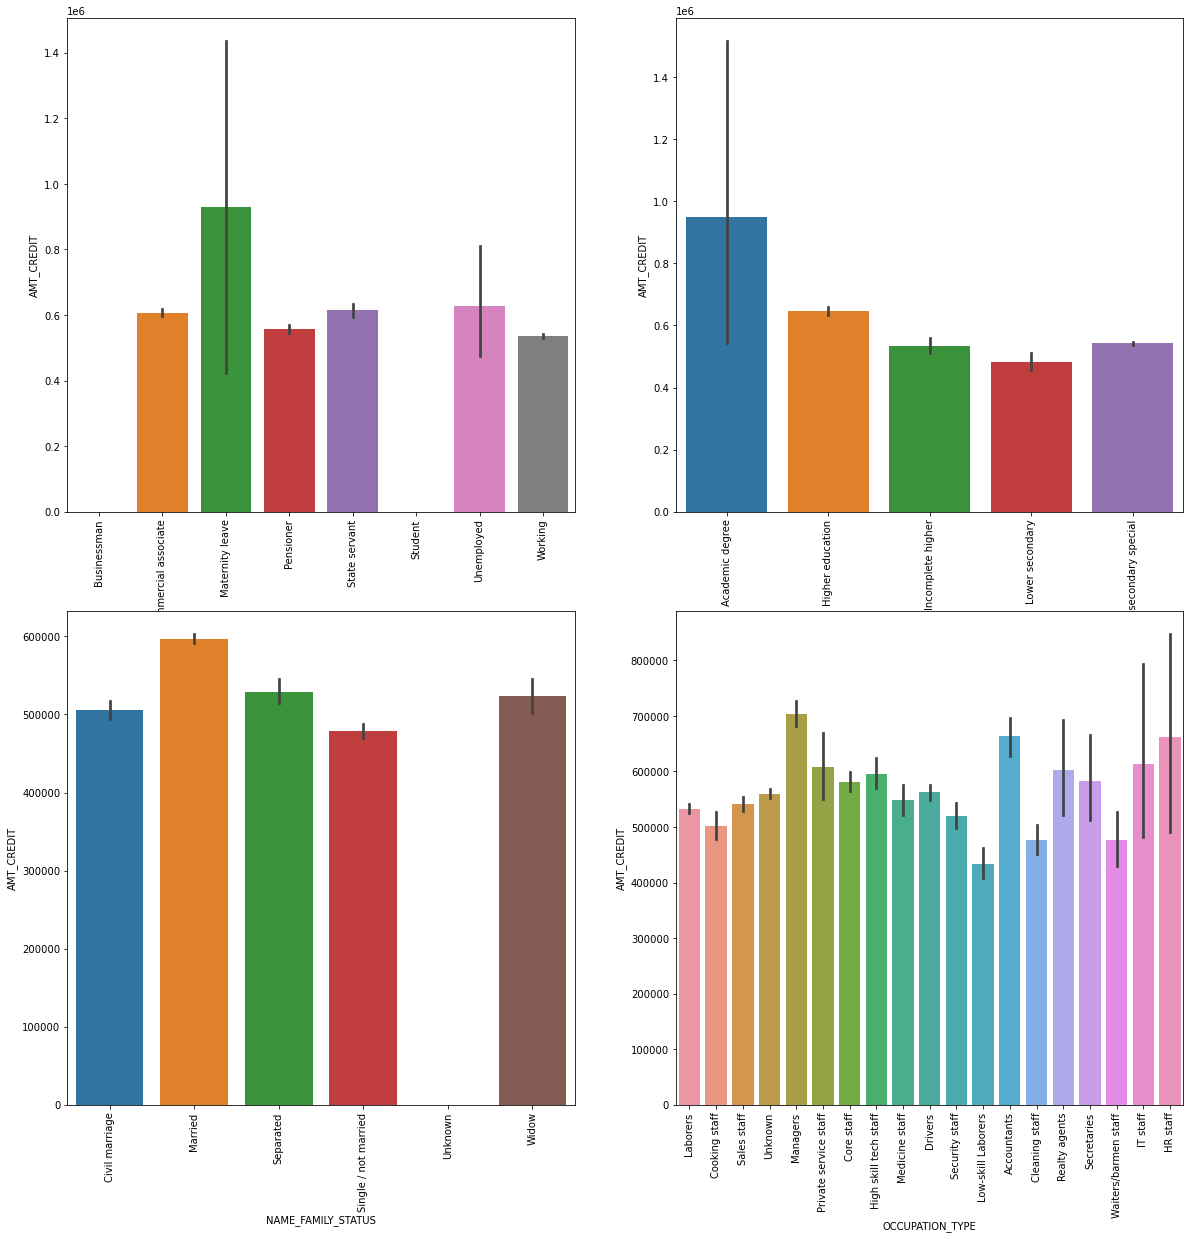

In [95]:
#Plot with AMT credit
fig,axes= plt.subplots(2, 2, figsize=(20, 20))
sns.barplot(ax=axes[0][0],x='NAME_INCOME_TYPE',y='AMT_CREDIT',data=defaulter)
sns.barplot(ax=axes[0][1],x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=defaulter)
sns.barplot(ax=axes[1][0],x='NAME_FAMILY_STATUS',y='AMT_CREDIT',data=defaulter)
sns.barplot(ax=axes[1][1],x='OCCUPATION_TYPE',y='AMT_CREDIT',data=defaulter)
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation='vertical')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation='vertical')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation='vertical')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation='vertical')
plt.show()

#### Observation: Credit amount variable is used for comparison.
1. Clients with maternity leave income type are the most defaulters.
2. Clients with academic degree are the most defaulters.
3. Married clients are the most defaulters.
4. Manager clients are the most defaulters.

### Analysis after merging the two dataframes

In [96]:
#Reading the second dataframe
prev_app = pd.read_csv('previous_application.csv')
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#Merging both the dataframes
merged_loan = pd.merge(app_data, prev_app, how='inner', on='SK_ID_CURR')
merged_loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AMT_GOODS_PRICE_BUCKETS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.92,1.75,9.99,5.81,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2L-3L,4L-5L,3L-4L,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,NaN,NaN,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.93,3.25,3.25,0.80,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2L-3L,NaN,NaN,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,F

In [98]:
#Checking the shape of the 'prev_app'
prev_app.shape

(1670214, 37)

In [99]:
#Checking the summary of the 'prev_app'
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [100]:
#Again dividing the merged dataframe into repayers and defaulters
mer_rep = merged_loan[merged_loan['TARGET']==0]
mer_def = merged_loan[merged_loan['TARGET']==1]

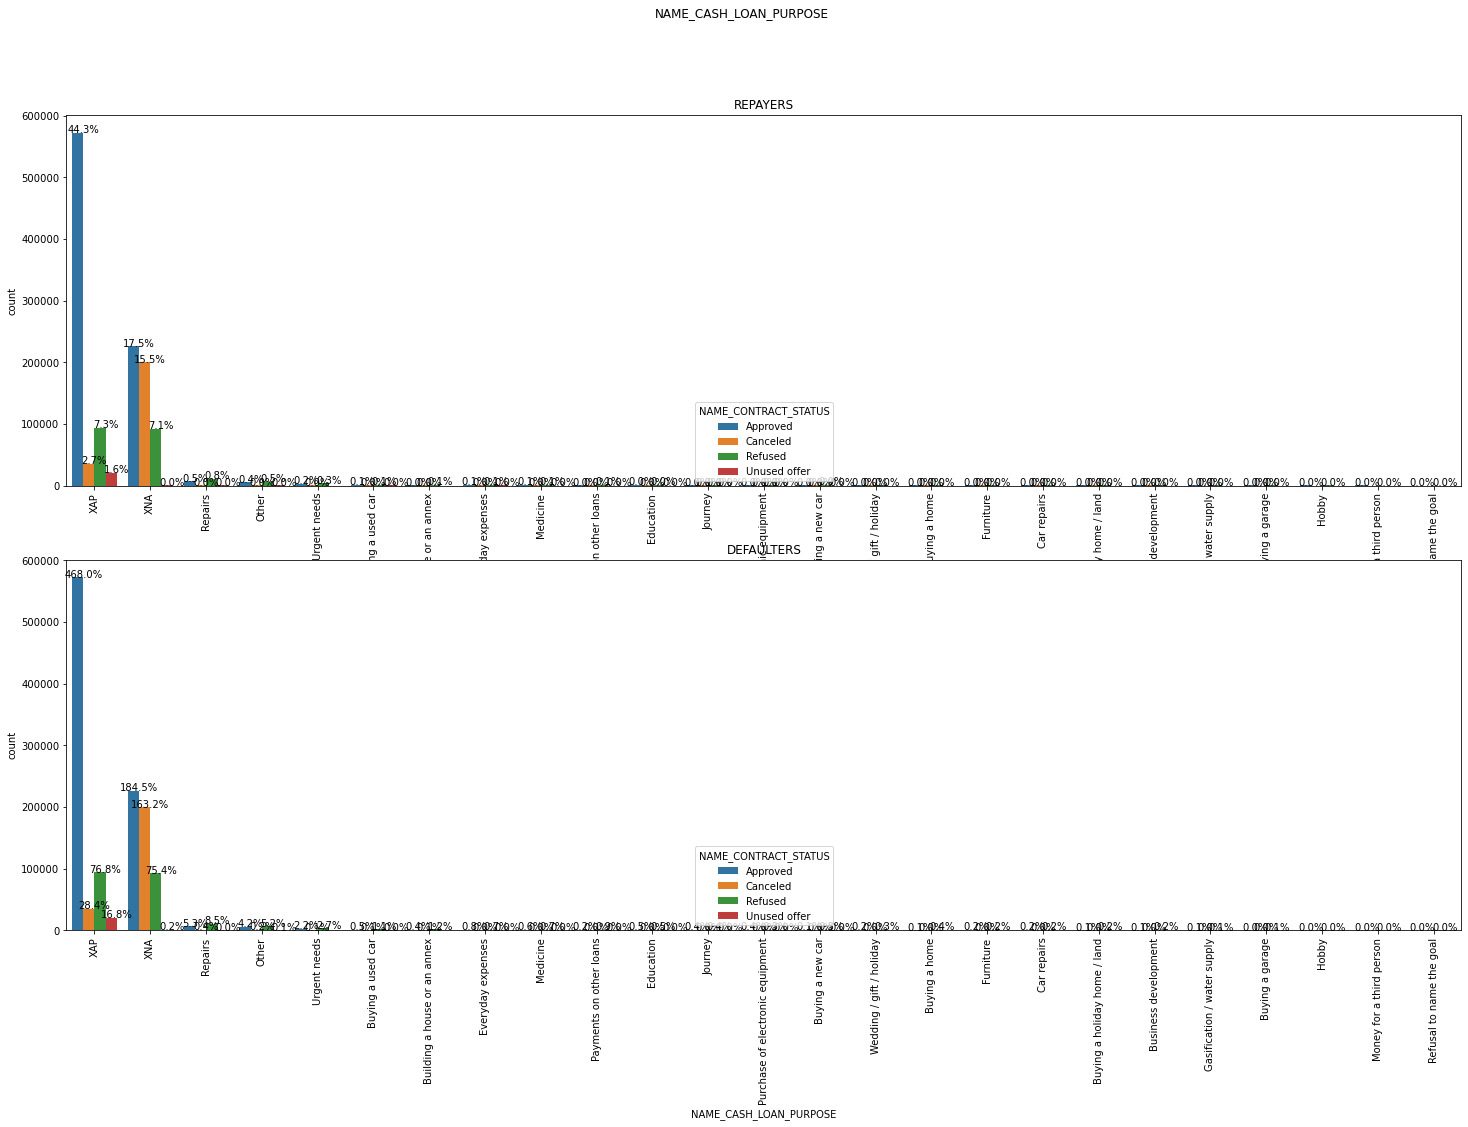

In [101]:
#Analysis of NAME_CASH_LOAN_PURPOSE with NAME_CONTRACT_STATUS
fig, axes = plt.subplots(2, 1, figsize=(25, 15), sharey=True)
fig.suptitle('NAME_CASH_LOAN_PURPOSE')
totalr = len(mer_rep.NAME_CASH_LOAN_PURPOSE)
totald = len(mer_def.NAME_CASH_LOAN_PURPOSE)

rep = sns.countplot(ax=axes[0], x='NAME_CASH_LOAN_PURPOSE', data=mer_rep,hue= "NAME_CONTRACT_STATUS",order=mer_rep['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
axes[0].set_title('REPAYERS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')

dflt = sns.countplot(ax=axes[1], x='NAME_CASH_LOAN_PURPOSE', data=mer_rep,hue= "NAME_CONTRACT_STATUS",order=mer_rep['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
axes[1].set_title('DEFAULTERS')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

for p in rep.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalr)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    rep.annotate(percentage, (x, y),ha='center')

for p in dflt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totald)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    dflt.annotate(percentage, (x, y),ha='center')

plt.show()

#### Observation:
1. XAP AND XNA values are unknown and in very high number as compared to other variables.
2. Bank has refused loan application for repairs (0.8%) and others (0.5%), and considered high risk by the banks.

### Conclusions:

1. Low Risk group with less defaulters:

    a. Clients with maternity leave income type.

    b. Clients with academic degree are the most defaulters.

    c. Married clients are the most defaulters.

    d. Manager clients are the most defaulters.

    e. Most of the repayers are with lower credit amount and lower goods price.

    f. Clients taking loan against goods price 2-3L are repayers.

    g. Clients with credit amount in range 2-3L repayers.

    h. Clients with income in range 1-2L are repayers.

    i. Clients working in Business type 3 are most likely to be repayers.

    j. Labour clients are the most repayers.

    k. Clients having secondary education and higher education are most likely to be repayers.

    l. The working professionals are most likely to be repayers.

    m. The clients who own a car (69.5%) are more likely to pay their loans

    n. The clients who don’t own a real estate are more likely to pay their loans.

    o. Females are more likely to pay their loans.


2. High risk groups with more defaulters:

    a. Clients with maternity leave income type.

    b. Clients with academic degree are the most defaulters.

    c. Married clients are the most defaulters.

    d. Manager clients are the most defaulters.

    e. Most of the defaulters are with lower to medium goods price and lower to medium loan annuity.

    f. Most of the defaulters are with lower to medium credit amount and lower to medium loan annuity.

    g. Most of the defaulters are with lower credit amount and lower goods price.

    h. Clients taking loan against goods price 4-5L and 2-3L are defaulters.

    i. Clients with credit amount in range 2-3L and 5-6L are defaulters.

    j. Clients with income in range 1-2L, 0-1L, and 2-3L are defaulters.

    k. Clients working in Business type 3, self-employed, XNA are defaulters.

    l. Labour clients are 23.3% defaulters, sales staff are 12.5% defaulters, and drivers are 8.5% defaulters.

    m. Clients having secondary education, and higher education are most likely to be defaulters.

    n. The working professionals are most likely to be defaulters.

    o. The clients who don't own a car are more likely to not pay their loans.

    p. The clients who own a real estate are more likely to not pay their loans.

    q. Female are more likely to not pay their loans.